In [1181]:
import pandas as pd
import numpy as np

In [1182]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
variable_data = pd.read_csv("VariableDescription.csv")

In [1183]:
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [1184]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [1185]:
train_data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [1186]:
test_data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [1187]:
test_data.shape, train_data.shape

((3069, 13), (7160, 14))

In [1188]:
variable_data

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [1189]:
# first we want to correct the columns so that they become lower cased and remove spaces
train_data.columns = train_data.columns.str.lower().str.replace(" ", "_")

test_data.columns = test_data.columns.str.lower().str.replace(" ", "_")

# check if thy are corrected
train_data.columns

Index(['customer_id', 'yearofobservation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'numberofwindows', 'geo_code', 'claim'],
      dtype='object')

In [1190]:
# we describe our data to check if there any missing values
train_data.describe()

,yearofobservation,insured_period,residential,building_dimension,building_type,date_of_occupancy,claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [1191]:
# we use is null to see
train_data.isnull().sum()

customer_id             0
yearofobservation       0
insured_period          0
residential             0
building_painted        0
building_fenced         0
garden                  7
settlement              0
building_dimension    106
building_type           0
date_of_occupancy     508
numberofwindows         0
geo_code              102
claim                   0
dtype: int64

In [1192]:
# we can also check the datatype to see the column of the missing values this will help on imputation method
train_data.dtypes

customer_id            object
yearofobservation       int64
insured_period        float64
residential             int64
building_painted       object
building_fenced        object
garden                 object
settlement             object
building_dimension    float64
building_type           int64
date_of_occupancy     float64
numberofwindows        object
geo_code               object
claim                   int64
dtype: object

In [1193]:
train_data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_9144\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,yearofobservation,insured_period,residential,building_dimension,building_type,date_of_occupancy,claim
yearofobservation,1.000000,0.025434,-0.040391,0.009128,0.005490,-0.029492,-0.016367
insured_period,0.025434,1.000000,-0.037620,0.007473,-0.017811,-0.003445,0.088715
residential,-0.040391,-0.037620,1.000000,0.057481,0.334039,-0.042058,0.063509
building_dimension,0.009128,0.007473,0.057481,1.000000,0.007935,0.207624,0.297089
building_type,0.005490,-0.017811,0.334039,0.007935,1.000000,-0.146608,0.112168
date_of_occupancy,-0.029492,-0.003445,-0.042058,0.207624,-0.146608,1.000000,0.019170
claim,-0.016367,0.088715,0.063509,0.297089,0.112168,0.019170,1.000000


In [1194]:
# for garden and geocode we going to use countfrequencey encoder
from feature_engine.imputation import CategoricalImputer

ci = CategoricalImputer(imputation_method="frequent")
train_data[["garden", "geo_code"]] = ci.fit_transform(
    train_data[["garden", "geo_code"]]
)
test_data[["garden", "geo_code"]] = ci.fit_transform(test_data[["garden", "geo_code"]])

# for date and bulding we can use mean median imputter
from feature_engine.imputation import MeanMedianImputer

mmi = MeanMedianImputer(imputation_method="median")
train_data[["building_dimension", "date_of_occupancy"]] = mmi.fit_transform(
    train_data[["building_dimension", "date_of_occupancy"]]
)
test_data[["building_dimension", "date_of_occupancy"]] = mmi.fit_transform(
    test_data[["building_dimension", "date_of_occupancy"]]
)

In [1195]:
# check if there still any missing
train_data.isnull().sum()

customer_id           0
yearofobservation     0
insured_period        0
residential           0
building_painted      0
building_fenced       0
garden                0
settlement            0
building_dimension    0
building_type         0
date_of_occupancy     0
numberofwindows       0
geo_code              0
claim                 0
dtype: int64

In [1196]:
test_data.shape, train_data.shape

((3069, 13), (7160, 14))

In [1197]:
# we need to rename columns year and windows

train_data.rename(
    columns={
        "yearofobservation": "year_of_observation",
        "numberofwindows": "number_of_windows",
    },
    inplace=True,
)
test_data.rename(
    columns={
        "yearofobservation": "year_of_observation",
        "numberofwindows": "number_of_windows",
    },
    inplace=True,
)
# check
test_data.columns

Index(['customer_id', 'year_of_observation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'number_of_windows', 'geo_code'],
      dtype='object')

In [1198]:
train_data.number_of_windows = train_data.number_of_windows.str.replace(
    "   .", "0"
).str.replace(">=10", "10")

test_data.number_of_windows = test_data.number_of_windows.str.replace(
    "   .", "0"
).str.replace(">=10", "10")

C:\Users\HP\AppData\Local\Temp\ipykernel_9144\2230402883.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data.number_of_windows = train_data.number_of_windows.str.replace(
C:\Users\HP\AppData\Local\Temp\ipykernel_9144\2230402883.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data.number_of_windows = test_data.number_of_windows.str.replace(


In [1199]:
# check if windows is now corrected
train_data.number_of_windows.unique()

array(['0', '4', '3', '2', '5', '10', '6', '7', '9', '8', '1'],
      dtype=object)

In [1200]:
train_data.date_of_occupancy=train_data.date_of_occupancy.astype(int)
test_data.date_of_occupancy=test_data.date_of_occupancy.astype(int)

In [1201]:
# set date as integer
train_data[["year_of_observation", "date_of_occupancy"]] = train_data[
    ["year_of_observation", "date_of_occupancy"]
].astype('object')
test_data[["year_of_observation", "date_of_occupancy"]] = test_data[
    ["year_of_observation", "date_of_occupancy"]
].astype('object')
train_data.dtypes

customer_id             object
year_of_observation     object
insured_period         float64
residential              int64
building_painted        object
building_fenced         object
garden                  object
settlement              object
building_dimension     float64
building_type            int64
date_of_occupancy       object
number_of_windows       object
geo_code                object
claim                    int64
dtype: object

In [1202]:
test_data.shape, train_data.shape

((3069, 13), (7160, 14))

In [1203]:
# i will assume everything happen on the fist day of the month
train_data[["year_of_observation", "date_of_occupancy"]] = train_data[
    ["year_of_observation", "date_of_occupancy"]
].apply(lambda x: pd.to_datetime(x, format="%Y", errors="coerce"))
test_data[["year_of_observation", "date_of_occupancy"]] = test_data[
    ["year_of_observation", "date_of_occupancy"]
].apply(lambda x: pd.to_datetime(x, format="%Y", errors="coerce"))
test_data.year_of_observation.dtypes

dtype('<M8[ns]')

In [1204]:
train_data.dropna(axis=0,inplace=True)
test_data.dropna(axis=0,inplace=True)

In [1205]:
train_data.isnull().sum()

customer_id            0
year_of_observation    0
insured_period         0
residential            0
building_painted       0
building_fenced        0
garden                 0
settlement             0
building_dimension     0
building_type          0
date_of_occupancy      0
number_of_windows      0
geo_code               0
claim                  0
dtype: int64

In [1206]:
train_data.head()

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code,claim
0,H14663,2013-01-01,1.0,0,N,V,V,U,290.0,1,1960-01-01,0,1053,0
1,H2037,2015-01-01,1.0,0,V,N,O,R,490.0,1,1850-01-01,4,1053,0
2,H3802,2014-01-01,1.0,0,N,V,V,U,595.0,1,1960-01-01,0,1053,0
3,H3834,2013-01-01,1.0,0,V,V,V,U,2840.0,1,1960-01-01,0,1053,0
4,H5053,2014-01-01,1.0,0,V,N,O,R,680.0,1,1800-01-01,3,1053,0


In [1207]:
train_data.columns


Index(['customer_id', 'year_of_observation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'number_of_windows', 'geo_code', 'claim'],
      dtype='object')

In [1208]:
#we need to encode the categorical values
#for painted,fenced,garden,settlement we use categorical encode
from feature_engine.encoding import OrdinalEncoder

oe = OrdinalEncoder(encoding_method='arbitrary')

train_data[
    [
        'building_painted', 'building_fenced', 'garden', 'settlement'
    ]
] = oe.fit_transform(train_data[
    [
        'building_painted', 'building_fenced', 'garden', 'settlement'
    ]
])

test_data[
    [
        'building_painted', 'building_fenced', 'garden', 'settlement'
    ]
] = oe.fit_transform(test_data[
    [
        'building_painted', 'building_fenced', 'garden', 'settlement'
    ]
])

test_data.head()

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code
0,H11920,2013-01-01,1.000000,0,0,0,0,0,300.0,1,1960-01-01,3,3310
1,H11921,2016-01-01,0.997268,0,0,0,0,0,300.0,1,1960-01-01,3,3310
2,H9805,2013-01-01,0.369863,0,0,1,1,1,790.0,1,1960-01-01,0,3310
3,H7493,2014-01-01,1.000000,0,0,0,0,0,1405.0,1,2004-01-01,3,3321
4,H7494,2016-01-01,1.000000,0,0,0,0,0,1405.0,1,2004-01-01,3,3321


In [1209]:
test_data.shape, train_data.shape

((3069, 13), (7152, 14))

In [1210]:
#discretization of the period
from feature_engine.discretisation import EqualFrequencyDiscretiser

ef =EqualFrequencyDiscretiser()

train_data[['insured_period']] = ef.fit_transform(train_data[['insured_period']])

test_data[['insured_period']] = ef.fit_transform(test_data[['insured_period']])

In [1211]:
test_data.shape, train_data.shape

((3069, 13), (7152, 14))

In [1212]:
variable_data

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [1213]:
#need to create new features
train_data = train_data.assign(
    year_occupied_before_insurance = train_data.year_of_observation.dt.year - train_data.date_of_occupancy.dt.year
)

test_data = test_data.assign(
    year_occupied_before_insurance = test_data.year_of_observation.dt.year - test_data.date_of_occupancy.dt.year
)
test_data.head()

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code,year_occupied_before_insurance
0,H11920,2013-01-01,2,0,0,0,0,0,300.0,1,1960-01-01,3,3310,53
1,H11921,2016-01-01,1,0,0,0,0,0,300.0,1,1960-01-01,3,3310,56
2,H9805,2013-01-01,0,0,0,1,1,1,790.0,1,1960-01-01,0,3310,53
3,H7493,2014-01-01,2,0,0,0,0,0,1405.0,1,2004-01-01,3,3321,10
4,H7494,2016-01-01,2,0,0,0,0,0,1405.0,1,2004-01-01,3,3321,12


In [1214]:
test_data.head()

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code,year_occupied_before_insurance
0,H11920,2013-01-01,2,0,0,0,0,0,300.0,1,1960-01-01,3,3310,53
1,H11921,2016-01-01,1,0,0,0,0,0,300.0,1,1960-01-01,3,3310,56
2,H9805,2013-01-01,0,0,0,1,1,1,790.0,1,1960-01-01,0,3310,53
3,H7493,2014-01-01,2,0,0,0,0,0,1405.0,1,2004-01-01,3,3321,10
4,H7494,2016-01-01,2,0,0,0,0,0,1405.0,1,2004-01-01,3,3321,12


In [1215]:
train_data.isnull().sum()

customer_id                       0
year_of_observation               0
insured_period                    0
residential                       0
building_painted                  0
building_fenced                   0
garden                            0
settlement                        0
building_dimension                0
building_type                     0
date_of_occupancy                 0
number_of_windows                 0
geo_code                          0
claim                             0
year_occupied_before_insurance    0
dtype: int64

In [1216]:
train_data

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code,claim,year_occupied_before_insurance
0,H14663,2013-01-01,2,0,0,0,0,0,290.0,1,1960-01-01,0,1053,0,53
1,H2037,2015-01-01,2,0,1,1,1,1,490.0,1,1850-01-01,4,1053,0,165
2,H3802,2014-01-01,2,0,0,0,0,0,595.0,1,1960-01-01,0,1053,0,54
3,H3834,2013-01-01,2,0,1,0,0,0,2840.0,1,1960-01-01,0,1053,0,53
4,H5053,2014-01-01,2,0,1,1,1,1,680.0,1,1800-01-01,3,1053,0,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7155,H5290,2012-01-01,2,1,1,0,0,0,1083.0,1,2001-01-01,0,6088,0,11
7156,H5926,2013-01-01,2,0,1,0,0,0,1083.0,2,1980-01-01,0,6088,1,33
7157,H6204,2016-01-01,0,0,1,0,0,0,1083.0,1,1992-01-01,0,6088,0,24
7158,H6537,2013-01-01,2,0,1,0,0,0,1083.0,1,1972-01-01,0,6088,0,41


In [1217]:
train_data.dtypes

customer_id                               object
year_of_observation               datetime64[ns]
insured_period                             int64
residential                                int64
building_painted                           int64
building_fenced                            int64
garden                                     int64
settlement                                 int64
building_dimension                       float64
building_type                              int64
date_of_occupancy                 datetime64[ns]
number_of_windows                         object
geo_code                                  object
claim                                      int64
year_occupied_before_insurance             int64
dtype: object

In [1218]:
agg_geocode = train_data.groupby('geo_code')['building_dimension'].mean().reset_index()
agg_geocode.rename(columns={'building_dimension': 'agg_geocode'}, inplace=True)
train_data = train_data.merge(agg_geocode, on='geo_code', how='left')
#train_data['size_to_agg_geocode_ratio'] = train_data['building_dimension']/ train_data['agg_geocode']

agg_geocode = test_data.groupby('geo_code')['building_dimension'].mean().reset_index()
agg_geocode.rename(columns={'building_dimension': 'agg_geocode'}, inplace=True)
test_data = test_data.merge(agg_geocode, on='geo_code', how='left')
#test_data['size_to_agg_geocode_ratio'] = test_data['building_dimension']/ test_data['agg_geocode']

#agg_geocode_type = train_data.groupby('geo_code')['building_type'].mean().reset_index()
#agg_geocode_type.rename(columns={'building_type': 'agg_geocode_type'}, inplace=True)
#train_data = train_data.merge(agg_geocode_type, on='geo_code', how='left')
##train_data['type_to_agg_geocode_ratio'] = train_data['building_type']/ train_data['agg_geocode_type']
#
#agg_geocode_type = test_data.groupby('geo_code')['building_type'].mean().reset_index()
#agg_geocode_type.rename(columns={'building_type': 'agg_geocode_type'}, inplace=True)
#test_data = test_data.merge(agg_geocode_type, on='geo_code', how='left')
##test_data['type_to_agg_geocode_ratio'] = test_data['building_type']/ test_data['agg_geocode_type']


# Calculate total insured period per Geo Code
total_insured_period = train_data.groupby('geo_code')['insured_period'].sum().reset_index()
total_insured_period.rename(columns={'insured_period': 'Total_Insured_Period'}, inplace=True)
train_data = train_data.merge(total_insured_period, on='geo_code', how='left')
#train_data['insured_to_agg_geocode_ratio'] = train_data['insured_period']/ train_data['agg_geocode']

total_insured_period = test_data.groupby('geo_code')['insured_period'].sum().reset_index()
total_insured_period.rename(columns={'insured_period': 'Total_Insured_Period'}, inplace=True)
test_data = test_data.merge(total_insured_period, on='geo_code', how='left')
#test_data['insured_to_agg_geocode_ratio'] = test_data['insured_period']/ train_data['agg_geocode']



In [1219]:
train_data.columns

Index(['customer_id', 'year_of_observation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'number_of_windows', 'geo_code', 'claim',
       'year_occupied_before_insurance', 'agg_geocode',
       'Total_Insured_Period'],
      dtype='object')

In [1220]:
train_data['year_occupied_before_insurance'] = train_data['year_occupied_before_insurance'].fillna(0)
test_data['year_occupied_before_insurance'] = test_data['year_occupied_before_insurance'].fillna(0)

average_size_by_type = train_data.groupby('building_type')['building_dimension'].mean().reset_index()
average_size_by_type.rename(columns={'building_dimension': 'Avg_Size_By_Type'}, inplace=True)
train_data = train_data.merge(average_size_by_type, on='building_type', how='left')
train_data['Size_Ratio_To_Avg'] = train_data['building_dimension'] / train_data['Avg_Size_By_Type']
average_size_by_type = test_data.groupby('building_type')['building_dimension'].mean().reset_index()
average_size_by_type.rename(columns={'building_dimension': 'Avg_Size_By_Type'}, inplace=True)
test_data = test_data.merge(average_size_by_type, on='building_type', how='left')
test_data['Size_Ratio_To_Avg'] = test_data['building_dimension'] / test_data['Avg_Size_By_Type']


train_data['total_window_area'] = train_data['building_dimension'] *  train_data['number_of_windows'].astype(int)
test_data['total_window_area'] = test_data['building_dimension'] *  test_data['number_of_windows'].astype(int)
train_data.head()

,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,date_of_occupancy,number_of_windows,geo_code,claim,year_occupied_before_insurance,agg_geocode,Total_Insured_Period,Avg_Size_By_Type,Size_Ratio_To_Avg,total_window_area
0,H14663,2013-01-01,2,0,0,0,0,0,290.0,1,1960-01-01,0,1053,0,53,979.0,10,1877.061916,0.154497,0.0
1,H2037,2015-01-01,2,0,1,1,1,1,490.0,1,1850-01-01,4,1053,0,165,979.0,10,1877.061916,0.261046,1960.0
2,H3802,2014-01-01,2,0,0,0,0,0,595.0,1,1960-01-01,0,1053,0,54,979.0,10,1877.061916,0.316985,0.0
3,H3834,2013-01-01,2,0,1,0,0,0,2840.0,1,1960-01-01,0,1053,0,53,979.0,10,1877.061916,1.513003,0.0
4,H5053,2014-01-01,2,0,1,1,1,1,680.0,1,1800-01-01,3,1053,0,214,979.0,10,1877.061916,0.362268,2040.0


In [1221]:
#total_size_by_type = train_data.groupby('building_type')['building_dimension'].sum().reset_index()
#total_size_by_type.rename(columns={'building_dimension': 'Total_Size_By_Type'}, inplace=True)
#train_data = train_data.merge(total_size_by_type, on='building_type', how='left')
#train_data['Size_Ratio_To_Total'] = train_data['building_dimension'] / train_data['Total_Size_By_Type']
#total_size_by_type = test_data.groupby('building_type')['building_dimension'].sum().reset_index()
#total_size_by_type.rename(columns={'building_dimension': 'Total_Size_By_Type'}, inplace=True)
#test_data = test_data.merge(total_size_by_type, on='building_type', how='left')
#test_data['Size_Ratio_To_Total'] = test_data['building_dimension'] / test_data['Total_Size_By_Type']
#

In [1222]:
#median_size_by_type = train_data.groupby('building_type')['building_dimension'].median().reset_index()
#median_size_by_type.rename(columns={'building_dimension': 'median_Size_By_Type'}, inplace=True)
#train_data = train_data.merge(median_size_by_type, on='building_type', how='left')
#train_data['Size_Ratio_To_median'] = train_data['building_dimension'] / train_data['median_Size_By_Type']
#median_size_by_type = test_data.groupby('building_type')['building_dimension'].median().reset_index()
#median_size_by_type.rename(columns={'building_dimension': 'median_Size_By_Type'}, inplace=True)
#test_data = test_data.merge(median_size_by_type, on='building_type', how='left')
#test_data['Size_Ratio_To_median'] = test_data['building_dimension'] / test_data['median_Size_By_Type']

In [1223]:
#train_data.drop(columns="Avg_Size_By_Type",inplace=True)
#test_data.drop(columns="Avg_Size_By_Type",inplace=True)

In [1224]:
train_data.columns

Index(['customer_id', 'year_of_observation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'number_of_windows', 'geo_code', 'claim',
       'year_occupied_before_insurance', 'agg_geocode', 'Total_Insured_Period',
       'Avg_Size_By_Type', 'Size_Ratio_To_Avg', 'total_window_area'],
      dtype='object')

In [1225]:
# Create lag features (e.g., claims in the previous year)
train_data['building_Last_Year'] = train_data.groupby('year_of_observation')['building_dimension'].shift()
#train_data['building_occupancy_Last_Year'] = train_data.groupby('date_of_occupancy')['building_dimension'].shift()


# Calculate rolling mean of claims over a 3-year window
train_data['Rolling_Mean_building'] = train_data.groupby('year_of_observation')['building_dimension'].rolling(window=3).mean().reset_index(level=0, drop=True)
train_data['Rolling_Mean_building_occupancy'] = train_data.groupby('date_of_occupancy')['building_dimension'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Create lag features (e.g., claims in the previous year)
test_data['building_Last_Year'] = test_data.groupby('year_of_observation')['building_dimension'].shift()
#test_data['building_occupancy_Last_Year'] = test_data.groupby('date_of_occupancy')['building_dimension'].shift()


# Calculate rolling mean of claims over a 3-year window
test_data['Rolling_Mean_building'] = test_data.groupby('year_of_observation')['building_dimension'].rolling(window=3).mean().reset_index(level=0, drop=True)
test_data['Rolling_Mean_building_occupancy'] = test_data.groupby('date_of_occupancy')['building_dimension'].rolling(window=3).mean().reset_index(level=0, drop=True)



In [1226]:
#using log transformer on numeric variables
from feature_engine.transformation import PowerTransformer
lt = PowerTransformer()
train_data[
    [
       'building_dimension','year_occupied_before_insurance'
    ]
] = lt.fit_transform(
   train_data[
    [
       'building_dimension','year_occupied_before_insurance'
    ]
] 
)

test_data[
    [
       'building_dimension','year_occupied_before_insurance'
    ]
] = lt.fit_transform(
   test_data[
    [
       'building_dimension','year_occupied_before_insurance'
    ]
] 
)
test_data.head()


,customer_id,year_of_observation,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,...,geo_code,year_occupied_before_insurance,agg_geocode,Total_Insured_Period,Avg_Size_By_Type,Size_Ratio_To_Avg,total_window_area,building_Last_Year,Rolling_Mean_building,Rolling_Mean_building_occupancy
0,H11920,2013-01-01,2,0,0,0,0,0,17.320508,1,...,3310,7.280110,463.333333,3,1568.842657,0.191224,900.0,NaN,NaN,NaN
1,H11921,2016-01-01,1,0,0,0,0,0,17.320508,1,...,3310,7.483315,463.333333,3,1568.842657,0.191224,900.0,NaN,NaN,NaN
2,H9805,2013-01-01,0,0,0,1,1,1,28.106939,1,...,3310,7.280110,463.333333,3,1568.842657,0.503556,0.0,300.0,NaN,463.333333
3,H7493,2014-01-01,2,0,0,0,0,0,37.483330,1,...,3321,3.162278,1405.000000,4,1568.842657,0.895565,4215.0,NaN,NaN,NaN
4,H7494,2016-01-01,2,0,0,0,0,0,37.483330,1,...,3321,3.464102,1405.000000,4,1568.842657,0.895565,4215.0,300.0,NaN,NaN


In [1227]:
test_data.shape, train_data.shape

((3069, 22), (7152, 23))

In [1228]:
train_data.isnull().sum()

customer_id                          0
year_of_observation                  0
insured_period                       0
residential                          0
building_painted                     0
building_fenced                      0
garden                               0
settlement                           0
building_dimension                   0
building_type                        0
date_of_occupancy                    0
number_of_windows                    0
geo_code                             0
claim                                0
year_occupied_before_insurance       0
agg_geocode                          0
Total_Insured_Period                 0
Avg_Size_By_Type                     0
Size_Ratio_To_Avg                    0
total_window_area                    0
building_Last_Year                   5
Rolling_Mean_building               10
Rolling_Mean_building_occupancy    237
dtype: int64

In [1229]:
train_data.dtypes
train_data.number_of_windows = train_data.number_of_windows.astype(int)
test_data.number_of_windows = test_data.number_of_windows.astype(int)

In [1230]:
train_data.isnull().sum()

customer_id                          0
year_of_observation                  0
insured_period                       0
residential                          0
building_painted                     0
building_fenced                      0
garden                               0
settlement                           0
building_dimension                   0
building_type                        0
date_of_occupancy                    0
number_of_windows                    0
geo_code                             0
claim                                0
year_occupied_before_insurance       0
agg_geocode                          0
Total_Insured_Period                 0
Avg_Size_By_Type                     0
Size_Ratio_To_Avg                    0
total_window_area                    0
building_Last_Year                   5
Rolling_Mean_building               10
Rolling_Mean_building_occupancy    237
dtype: int64

In [1231]:
train_data.shape,test_data.shape

((7152, 23), (3069, 22))

In [1232]:
from feature_engine.datetime import DatetimeFeatures
def create_date_features_and_concat(
        train:pd.DataFrame,

):
    dtf = DatetimeFeatures(features_to_extract = ["year"],drop_original=False)
    train = dtf.fit_transform(train)
    return train

In [1233]:
train_data.columns

Index(['customer_id', 'year_of_observation', 'insured_period', 'residential',
       'building_painted', 'building_fenced', 'garden', 'settlement',
       'building_dimension', 'building_type', 'date_of_occupancy',
       'number_of_windows', 'geo_code', 'claim',
       'year_occupied_before_insurance', 'agg_geocode', 'Total_Insured_Period',
       'Avg_Size_By_Type', 'Size_Ratio_To_Avg', 'total_window_area',
       'building_Last_Year', 'Rolling_Mean_building',
       'Rolling_Mean_building_occupancy'],
      dtype='object')

In [1234]:

train_data = create_date_features_and_concat(train_data
)

test_data = create_date_features_and_concat(test_data
)
train_data.drop(
    columns=['year_of_observation','date_of_occupancy'],inplace=True
)
test_data.drop(
    columns=['year_of_observation','date_of_occupancy'],inplace=True
)



In [1235]:
test_data['geo_code']

0       3310
1       3310
2       3310
3       3321
4       3321
        ... 
3064    6083
3065    6083
3066    6083
3067    6083
3068    6083
Name: geo_code, Length: 3069, dtype: object

In [1236]:
train_data.shape,test_data.shape

((7152, 23), (3069, 22))

In [1237]:
train_data.isnull().sum()

customer_id                          0
insured_period                       0
residential                          0
building_painted                     0
building_fenced                      0
garden                               0
settlement                           0
building_dimension                   0
building_type                        0
number_of_windows                    0
geo_code                             0
claim                                0
year_occupied_before_insurance       0
agg_geocode                          0
Total_Insured_Period                 0
Avg_Size_By_Type                     0
Size_Ratio_To_Avg                    0
total_window_area                    0
building_Last_Year                   5
Rolling_Mean_building               10
Rolling_Mean_building_occupancy    237
year_of_observation_year             0
date_of_occupancy_year               0
dtype: int64

In [1238]:
'''
train_data[
    [
        'year_of_observation_year', 'date_of_occupancy_year
    ]
] = oe.fit_transform(train_data[
    [
        'year_of_observation_year', 'date_of_occupancy_year'
    ]
].astype(str))
test_data[
    [
        'year_of_observation_year', 'date_of_occupancy_year'
    ]
] = oe.fit_transform(test_data[
    [
        'year_of_observation_year', 'date_of_occupancy_year'
    ]
].astype(str))'''

"\ntrain_data[\n    [\n        'year_of_observation_year', 'date_of_occupancy_year\n    ]\n] = oe.fit_transform(train_data[\n    [\n        'year_of_observation_year', 'date_of_occupancy_year'\n    ]\n].astype(str))\ntest_data[\n    [\n        'year_of_observation_year', 'date_of_occupancy_year'\n    ]\n] = oe.fit_transform(test_data[\n    [\n        'year_of_observation_year', 'date_of_occupancy_year'\n    ]\n].astype(str))"

In [1239]:
train_data

,customer_id,insured_period,residential,building_painted,building_fenced,garden,settlement,building_dimension,building_type,number_of_windows,...,agg_geocode,Total_Insured_Period,Avg_Size_By_Type,Size_Ratio_To_Avg,total_window_area,building_Last_Year,Rolling_Mean_building,Rolling_Mean_building_occupancy,year_of_observation_year,date_of_occupancy_year
0,H14663,2,0,0,0,0,0,17.029386,1,0,...,979.000000,10,1877.061916,0.154497,0.0,NaN,NaN,NaN,2013,1960
1,H2037,2,0,1,1,1,1,22.135944,1,4,...,979.000000,10,1877.061916,0.261046,1960.0,NaN,NaN,NaN,2015,1850
2,H3802,2,0,0,0,0,0,24.392622,1,0,...,979.000000,10,1877.061916,0.316985,0.0,NaN,NaN,NaN,2014,1960
3,H3834,2,0,1,0,0,0,53.291650,1,0,...,979.000000,10,1877.061916,1.513003,0.0,290.0,NaN,1241.666667,2013,1960
4,H5053,2,0,1,1,1,1,26.076810,1,3,...,979.000000,10,1877.061916,0.362268,2040.0,595.0,NaN,NaN,2014,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,H5290,2,1,1,0,0,0,32.908965,1,0,...,1848.359184,380,1877.061916,0.576966,0.0,1083.0,1083.0,1083.000000,2012,2001
7148,H5926,2,0,1,0,0,0,32.908965,2,0,...,1848.359184,380,1852.585580,0.584588,0.0,1083.0,1083.0,1083.000000,2013,1980
7149,H6204,0,0,1,0,0,0,32.908965,1,0,...,1848.359184,380,1877.061916,0.576966,0.0,1083.0,1083.0,2970.333333,2016,1992
7150,H6537,2,0,1,0,0,0,32.908965,1,0,...,1848.359184,380,1877.061916,0.576966,0.0,1083.0,1083.0,3188.666667,2013,1972


In [1240]:
train_data['Rolling_Mean_building_occupancy'] = train_data['Rolling_Mean_building_occupancy'].fillna(0)
test_data['Rolling_Mean_building_occupancy'] = test_data['Rolling_Mean_building_occupancy'].fillna(0)

In [1241]:
#feature creation
from feature_engine.creation import CyclicalFeatures
cf = CyclicalFeatures(variables=['year_occupied_before_insurance','building_dimension','building_type','Total_Insured_Period'])
train_data = cf.fit_transform(train_data)
test_data = cf.fit_transform(test_data)

In [1242]:
#train_data.drop(columns='building_type_sin',inplace=True)
#test_data.drop(columns='building_type_sin',inplace=True)

In [1243]:
from feature_engine.timeseries.forecasting import LagFeatures
#lf = LagFeatures(periods=[1,2],variables=['insured_period','year_occupied_before_insurance','number_of_windows','building_dimension'])
#train_data = lf.fit_transform(train_data)
#test_data = lf.fit_transform(test_data)

In [1244]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

In [1245]:
X=train_data.drop(["claim","customer_id"],axis=1)
X_t=test_data.drop(["customer_id",],axis=1)
y=train_data["claim"]

In [1246]:
X.shape , X_t.shape

((7152, 29), (3069, 29))

In [1247]:
#encode the geocode feature
from feature_engine.encoding import MeanEncoder
woe = MeanEncoder()
X.drop(columns=['geo_code','garden','settlement','building_painted','building_fenced'],inplace=True)
X_t.drop(columns=['geo_code','garden','settlement','building_painted','building_fenced'],inplace=True)
#X[['geo_code']] =woe.fit_transform(X[['geo_code']],X[['settlement']])
#X_t[['geo_code']] = woe.fit_transform(X_t[['geo_code']],X_t[['settlement']])

In [1248]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#X = pd.DataFrame(scaler.fit_transform(X))

#X_t = pd.DataFrame(scaler.transform(X_t))


In [1249]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [1250]:
X_train

,insured_period,residential,building_dimension,building_type,number_of_windows,year_occupied_before_insurance,agg_geocode,Total_Insured_Period,Avg_Size_By_Type,Size_Ratio_To_Avg,...,year_of_observation_year,date_of_occupancy_year,year_occupied_before_insurance_sin,year_occupied_before_insurance_cos,building_dimension_sin,building_dimension_cos,building_type_sin,building_type_cos,Total_Insured_Period_sin,Total_Insured_Period_cos
2843,2,1,54.772256,3,0,5.744563,2446.140351,89,1842.366667,1.628340,...,2013,1980,0.896204,-0.443642,0.691362,-0.722509,-1.000000e+00,-1.836970e-16,0.995083,0.099046
577,1,1,46.754679,4,0,6.000000,1451.588235,25,1974.755776,1.106972,...,2016,1980,0.852554,-0.522640,0.896363,-0.443321,-2.449294e-16,1.000000e+00,0.401695,0.915773
59,2,0,42.918527,1,0,5.196152,1793.416667,23,1877.061916,0.981321,...,2015,1988,0.964878,-0.262700,0.957459,-0.288570,1.000000e+00,6.123234e-17,0.371197,0.928554
3165,2,0,26.267851,1,0,5.656854,1990.318182,37,1877.061916,0.367596,...,2012,1980,0.909525,-0.415650,0.908865,0.417091,1.000000e+00,6.123234e-17,0.574329,0.818625
787,2,0,43.817805,1,4,6.082763,1703.500000,34,1877.061916,1.022875,...,2015,1978,0.836902,-0.547352,0.945464,-0.325727,1.000000e+00,6.123234e-17,0.533032,0.846095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,20.000000,2,4,5.099020,1540.714286,36,1852.585580,0.215914,...,2014,1988,0.973326,-0.229425,0.763298,0.646046,1.224647e-16,-1.000000e+00,0.560715,0.828009
5191,2,1,30.822070,4,4,7.937254,1715.155556,77,1974.755776,0.481072,...,2013,1950,0.329823,-0.944043,0.973094,0.230408,-2.449294e-16,1.000000e+00,0.956036,0.293250
5226,2,1,42.895221,4,0,6.480741,1400.926829,69,1974.755776,0.931761,...,2012,1970,0.751894,-0.659284,0.957750,-0.287601,-2.449294e-16,1.000000e+00,0.909007,0.416782
5390,0,1,58.480766,2,0,5.291503,3420.000000,0,1852.585580,1.846069,...,2016,1988,0.955478,-0.295063,0.566579,-0.824008,1.224647e-16,-1.000000e+00,0.000000,1.000000


In [1251]:
#i have also added n_jobs
parameters = {
            'nthread':4,
            'n_estimators':50,
            'learning_rate':0.036,
            'num_leaves':30,
            'colsample_bytree':0.9497036,
            'subsample':0.8715623,
            'max_depth':0,
            'reg_alpha':0,
            'reg_lambda':0.0735294,
            'min_split_gain':0.0222415,
            'min_child_weight':39.3259775,
            'silent':-1,
            'verbose':-1,
            'bagging_seed':5,
            'feature_fraction': 0.957,
            'bagging_fraction': 0.956,
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'n_jobs':-1,
            'metric': 'auc'}

In [1252]:

train_data_ = lgb.Dataset(X_train, label=y_train)
test_data_ = lgb.Dataset(X_test, label=y_test)


param = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 30,
    "n_estimators":50,
    'learning_rate': 0.036,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'reg_alpha': 1,
    'reg_lambda': 0,
    "max_depth":0,
    "lambda_l2":.999
}
clf =lgb.train(params=parameters, 
                train_set=train_data_,
                valid_sets=[test_data_])

# Make predictions on the test set
y_pred = clf.predict(X_test, num_iteration=clf.best_iteration)

# Evaluate the model using ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC score: {roc_auc:.4f}')

ROC AUC score: 0.7106


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [1253]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
NFOLDS = 15

folds = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=42)


columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf_fold = lgb.train(parameters, dtrain, 10000, valid_sets = [dtrain, dvalid])
    
    feature_importances[f'fold_{fold_n + 1}'] = clf_fold.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += clf_fold.predict(X_test) / NFOLDS
    
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 1 | AUC: 0.7822846031112883
Fold 2 | AUC: 0.6941065017949741
Fold 3 | AUC: 0.7272138013562026


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 4 | AUC: 0.7178026525727962
Fold 5 | AUC: 0.7146614479457518
Fold 6 | AUC: 0.7163193059433587


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 7 | AUC: 0.7456621459912246
Fold 8 | AUC: 0.800109692859992
Fold 9 | AUC: 0.7276251495811727


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 10 | AUC: 0.7964574192261666
Fold 11 | AUC: 0.7926929597128042
Fold 12 | AUC: 0.7642226765057838


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Fold 13 | AUC: 0.7658011272141707
Fold 14 | AUC: 0.7365640096618357
Fold 15 | AUC: 0.7606429517786166

Mean AUC = 0.7494777630170761
Out of folds AUC = 0.7499648544742225


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


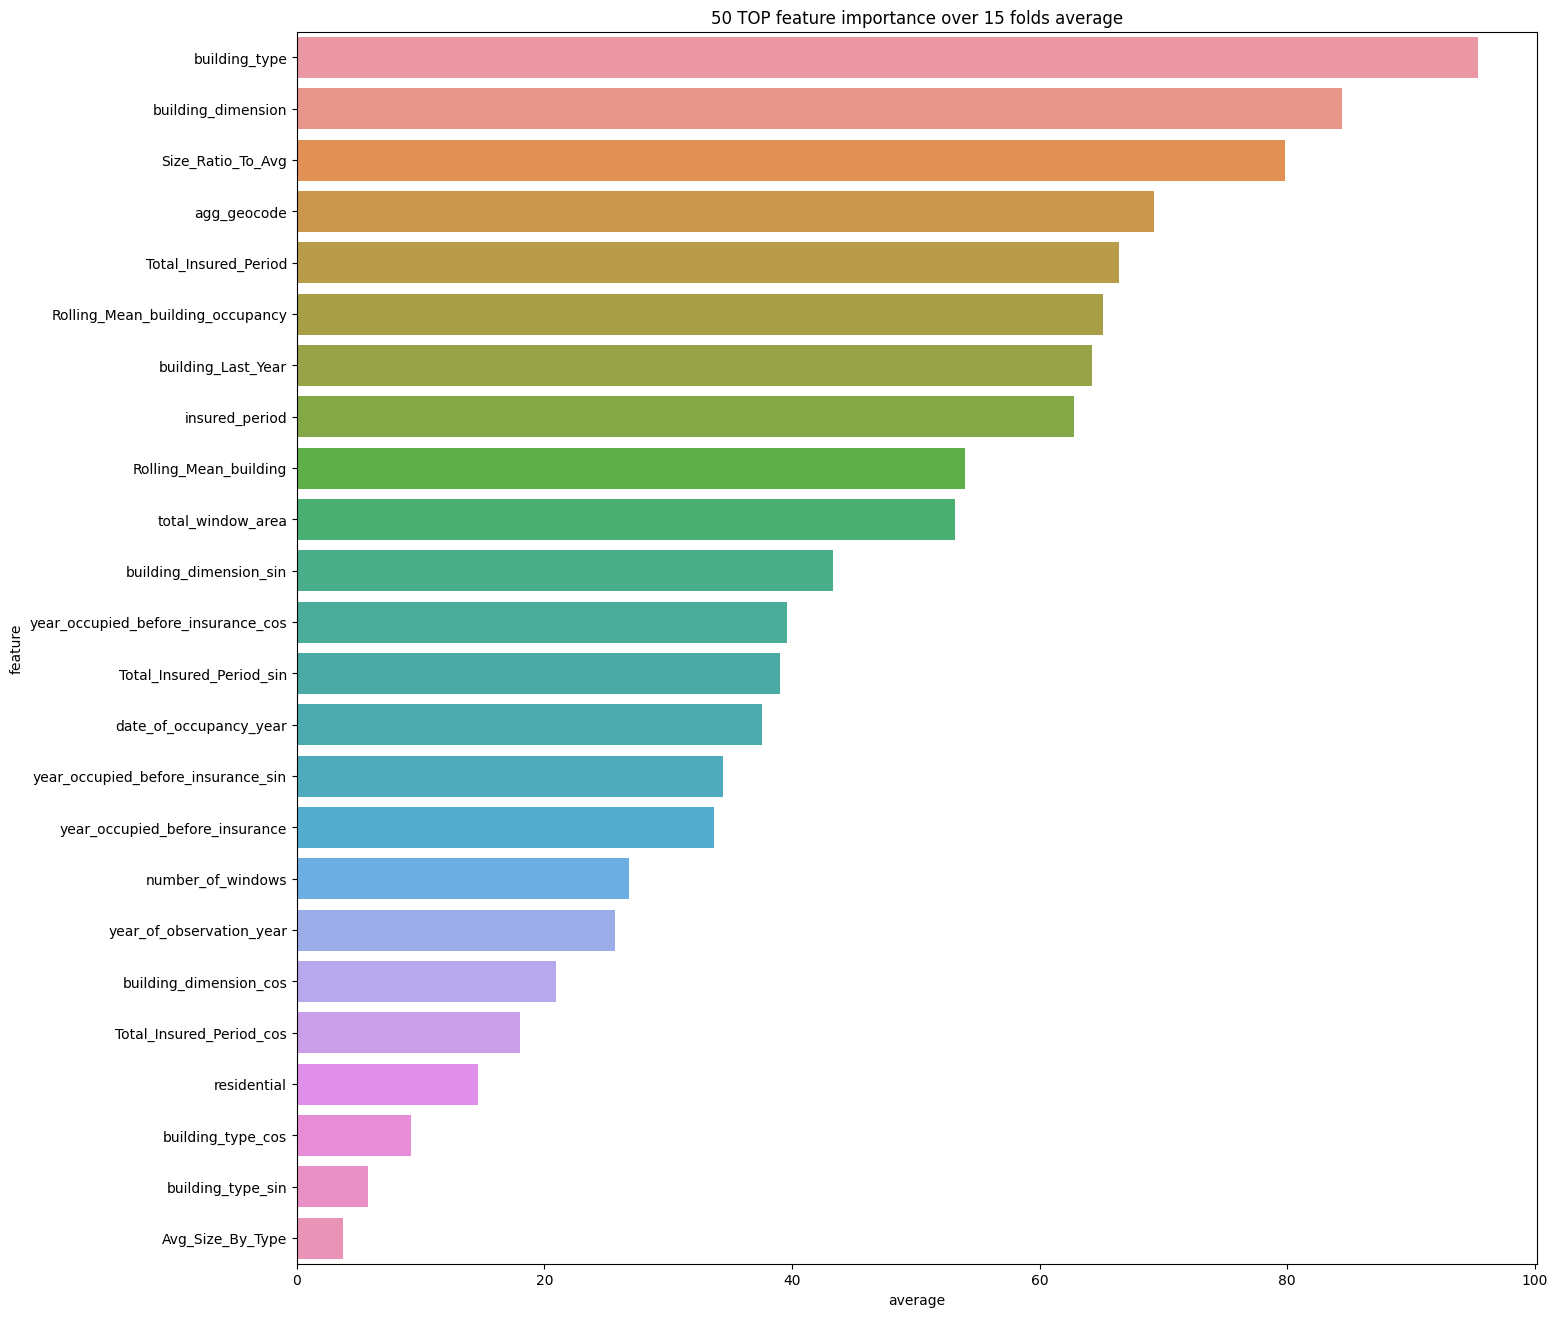

In [1254]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
#feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [1255]:
# Make predictions on the test set using the best LightGBM model
y_pred_c = clf.predict(X_t, num_iteration=clf.best_iteration)


In [1256]:
test_id = test_data['customer_id']


In [1257]:
d = {"customer_id": test_id, 'claim':y_pred_c}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["customer_id", 'claim']]

In [1258]:
test_predictions

,customer_id,claim
0,H11920,0.095622
1,H11921,0.094662
2,H9805,0.103452
3,H7493,0.158415
4,H7494,0.162073
...,...,...
3064,H11583,0.245547
3065,H11720,0.173890
3066,H11721,0.135432
3067,H12408,0.179548


In [1108]:
test_predictions.to_csv('2023_first_submission_1.csv', index=False)

In [ ]:
#you can just remove the created total,meadian to revert to original befire changes